In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import copy
#%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)


# import  the csv file 

In [2]:
X= pd.read_csv('CarPrice_Assignment.csv')
X

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### to get overall information about input data we use .info()

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### .isna() to find number of null values

In [4]:
X.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
#Read data into dataframe 
X=pd.read_csv('CarPrice_Assignment.csv')
Y=X.price #Target Variable 
X=X.drop(['price'],axis=1) #Input data



#Checking if scale and encoding is required
#print(X.head())
print(Y.head())

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64


### .head()   to obtain first 5 row and column information

In [6]:
X.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


### .describe() to get statistical information of whole data

In [55]:
#Understanding the dataset 
X.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


### visual representation of relationship between 2 variables : sns.pairplot()

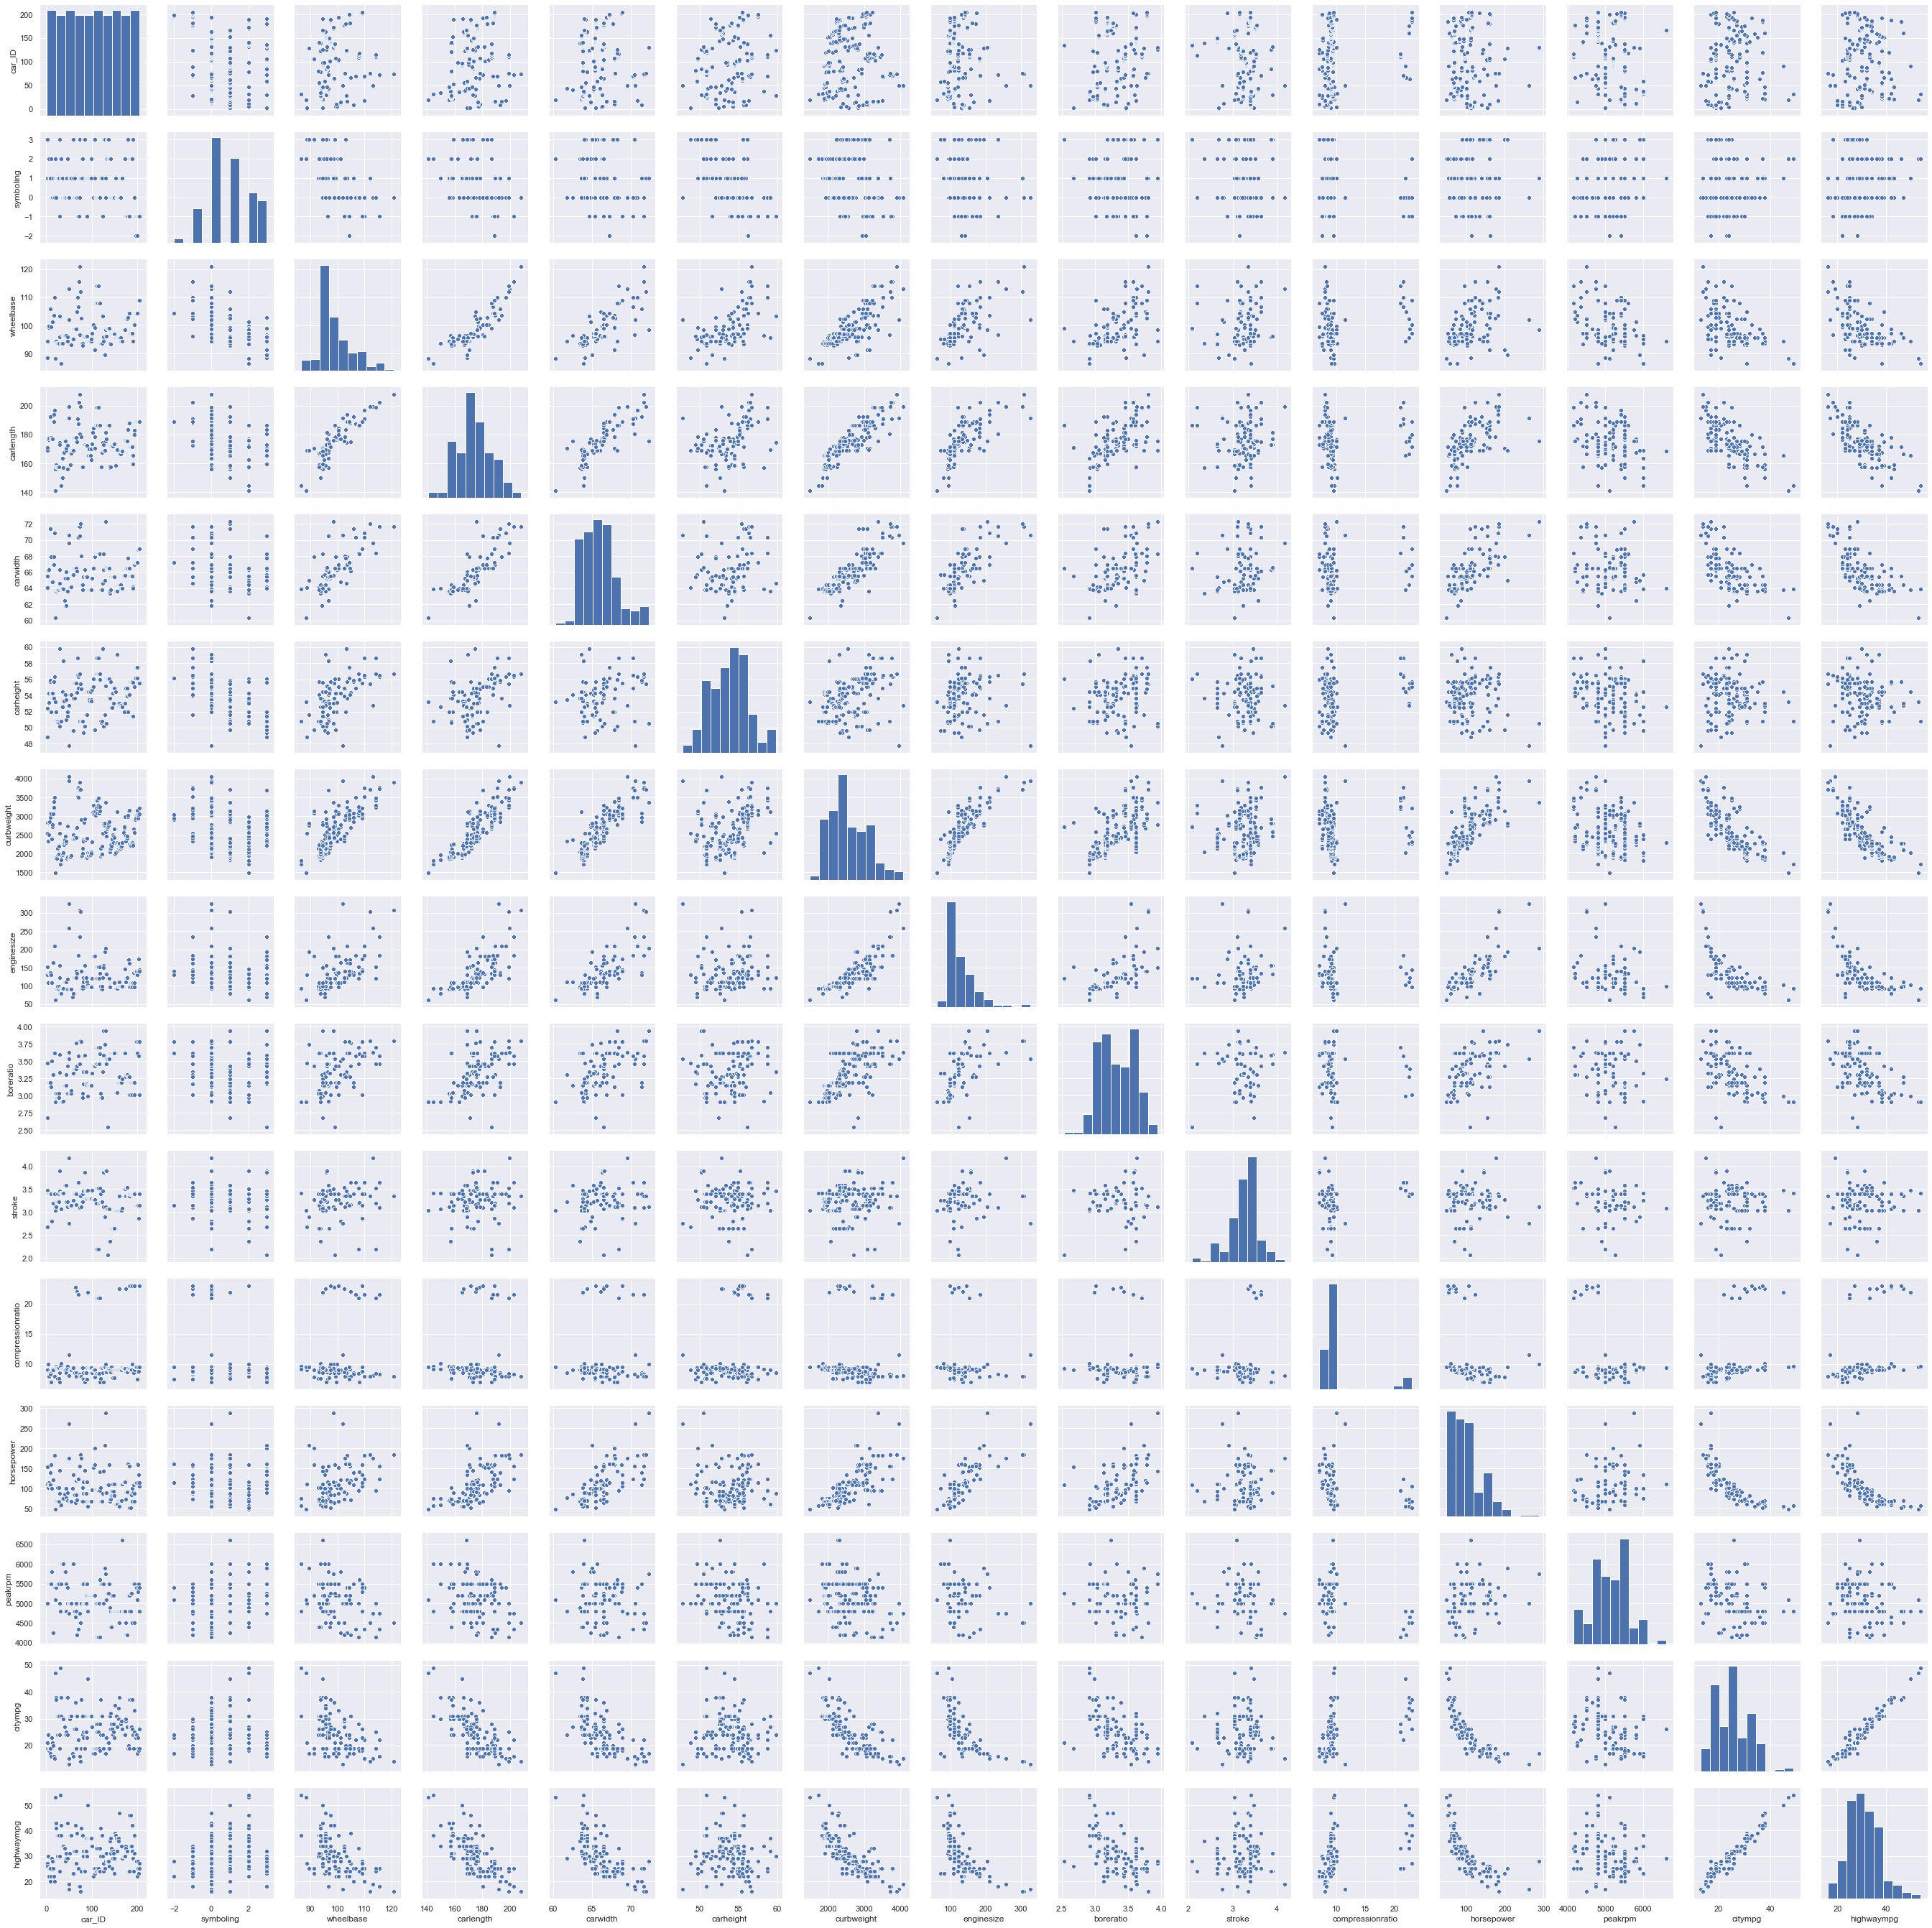

In [56]:
plt.rcParams["figure.figsize"] = [10,9]
sns.set(style="darkgrid")
sns.pairplot(data=X)

### distplot:

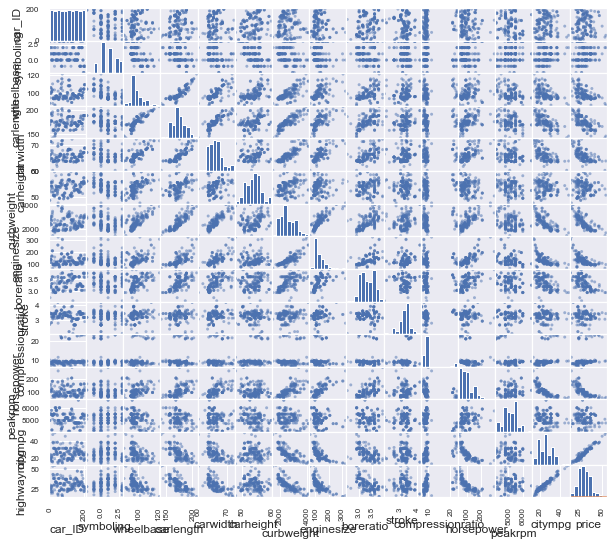

In [57]:
scatter_matrix(X)                                                                
sns.distplot(Y, bins=30)
plt.show()




### for visual representation of concentraton of values: sns.heatmap()

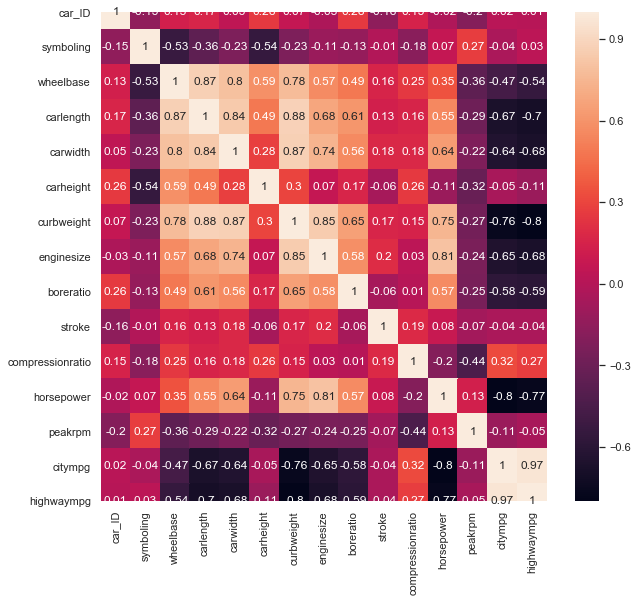

In [58]:
#Plot Y in timeseries data
Y.plot()

correlation_matrix = X.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### label encoding to convert categorical to numerical data

In [59]:
print(X['doornumber'].value_counts())

four    115
two      90
Name: doornumber, dtype: int64


In [60]:
print(X['cylindernumber'].value_counts())

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64


In [7]:
cleanup_nums = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
X.replace(cleanup_nums, inplace=True)


In [8]:
#Copying all categorical data into another dataframe using copy
Cat=X.select_dtypes(include=['object']).copy(deep='False')


In [9]:
#Transposing or resizing Cat df
Cat=Cat.iloc[:, :].apply(pd.Series)
Name=Cat.CarName.copy()


In [10]:
#Splitting all values of CarName
Temp=[]
Temp=Name.str.split(pat=" ",expand=True)
Temp=Temp[0]
X.CarName=Temp
Cat.CarName=Temp

In [11]:
Temp

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: 0, Length: 205, dtype: object

### oneHotEncoding to convert into numerical data using    pd.get_dummies() - dummy method

In [12]:

#OneHotEncoding using dummy method
L=X.copy(deep='False')
print(L)
L=pd.get_dummies(L, columns=Cat.columns)
print(L)

     car_ID  symboling      CarName fueltype aspiration  doornumber  \
0         1          3  alfa-romero      gas        std           2   
1         2          3  alfa-romero      gas        std           2   
2         3          1  alfa-romero      gas        std           2   
3         4          2         audi      gas        std           4   
4         5          2         audi      gas        std           4   
..      ...        ...          ...      ...        ...         ...   
200     201         -1        volvo      gas        std           4   
201     202         -1        volvo      gas      turbo           4   
202     203         -1        volvo      gas        std           4   
203     204         -1        volvo   diesel      turbo           4   
204     205         -1        volvo      gas      turbo           4   

         carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0    convertible        rwd          front       88.6      168.8     

In [13]:

L=X.copy(deep='False')
print(L)
L=pd.get_dummies(L, columns=Cat.columns)
L

     car_ID  symboling      CarName fueltype aspiration  doornumber  \
0         1          3  alfa-romero      gas        std           2   
1         2          3  alfa-romero      gas        std           2   
2         3          1  alfa-romero      gas        std           2   
3         4          2         audi      gas        std           4   
4         5          2         audi      gas        std           4   
..      ...        ...          ...      ...        ...         ...   
200     201         -1        volvo      gas        std           4   
201     202         -1        volvo      gas      turbo           4   
202     203         -1        volvo      gas        std           4   
203     204         -1        volvo   diesel      turbo           4   
204     205         -1        volvo      gas      turbo           4   

         carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0    convertible        rwd          front       88.6      168.8     

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_Nissan,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_maxda,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porcshce,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_toyouta,CarName_vokswagen,CarName_volkswagen,CarName_volvo,CarName_vw,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,202,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,203,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
203,204,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


### .shape() to get rows,columns information

In [68]:
L.shape

(205, 74)

###  scale() - to normalise independent variable

In [14]:


Xs = scale(L)

In [15]:
Xs

array([[-1.72362229,  1.74347043, -1.13038833, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [-1.70672403,  1.74347043, -1.13038833, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [-1.68982577,  0.133509  , -1.13038833, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       ...,
       [ 1.68982577, -1.47645244,  0.88465174, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 1.70672403, -1.47645244,  0.88465174, ..., -0.92024282,
        -0.21428571, -0.070014  ],
       [ 1.72362229, -1.47645244,  0.88465174, ...,  1.08666971,
        -0.21428571, -0.070014  ]])

### fitting the model:

In [16]:
#Splitting data into test and train - 30% Test
X_train, X_test, Y_train, Y_test = train_test_split(Xs, Y, test_size=0.3, random_state=42)


In [17]:
X_train.shape

(143, 74)

### regression coefficients are values that multiply predictor values

In [18]:
#Finding correlation coeff
Coef=LinearRegression()

Coef.fit(X_train, Y_train)        
Y_pred = Coef.predict(X_test)                                   

# The coefficients
print('Coefficients: \n', Coef.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Coefficients: 
 [ 7.59451250e+03 -1.45868234e+02  1.79887980e+02  6.26213266e+01
 -1.11222669e+03  1.52223989e+03 -1.03614769e+02  2.22246364e+03
 -9.93277308e+02  4.37879008e+03 -1.00208314e+03 -1.85798738e+02
  3.82261483e+02  1.60107423e+02  8.26912093e+02  8.63776254e+02
 -2.26997259e+02 -3.76276276e+15 -6.48527005e+15 -9.80783991e+15
 -1.04585111e+16 -1.04585111e+16 -6.48527005e+15 -1.10647357e+16
 -1.31617623e+16 -7.46998582e+15 -6.48527005e+15 -5.30829158e+15
 -1.40641725e+16 -3.76276276e+15 -1.31617623e+16 -1.48934441e+16
  6.35771877e+15 -9.80783991e+15 -3.76276276e+15 -7.46998582e+15
 -5.30829158e+15 -9.10319648e+15 -1.38644291e+16 -1.93484965e+16
 -3.76276276e+15  8.30845536e+15 -1.10647357e+16 -1.21699547e+16
 -5.30829158e+15  1.96433404e+16  3.58747055e+16  5.76844679e+15
  5.76844679e+15 -3.24397047e+15 -3.72694372e+15 -9.12621367e+15
 -9.60336849e+15 -6.29768574e+15  5.01087576e+15  1.20493725e+16
  1.18131575e+16  5.34729161e+15  4.74055677e+15  3.29782935e+15
  9.78754

In [19]:
mean_squared_error(Y_test, Y_pred)

6.776381791982425e+32

In [20]:
r2_score(Y_test, Y_pred)

-9.780533401333613e+24

In [29]:
df5=pd.DataFrame({'actual' : Y_test , 'predicted' : Y_pred})
df5.head(10)


,actual,predicted
15,30760.000,2.954575e+04
9,17859.167,2.155975e+04
100,9549.000,1.056575e+04
132,11850.000,1.279975e+04
68,28248.000,3.264775e+04
95,7799.000,6.567750e+03
159,7788.000,5.847750e+03
162,9258.000,7.965750e+03
147,10198.000,8.207750e+03
182,7775.000,1.732566e+17
